# Sparse matrix in PDEs using FEniCS
In this notebook, we use the [FEniCS](https://fenicsproject.org/) package to express a simple partial differential equation and generate the associated sparse matrix that need to be solve in the context of finite element method for solving the initial problem.

In this example we use a 2D poisson equation and its implementation with FEniCS is largely inspired by [this demo](https://fenicsproject.org/docs/dolfin/2018.1.0/python/demos/poisson/demo_poisson.py.html) found in the documentation. 

## Import DOLFIN

In [1]:
import matplotlib.pylab as plt

from dolfin import *
print dolfin.dolfin_version()

2017.2.0


## Create mesh

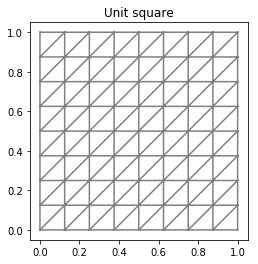

In [2]:
# Create mesh and define function space
N = 8 # mesh dimension
mesh = UnitSquareMesh(N, N)
#V = FunctionSpace(mesh, "Lagrange", 1)
V = FunctionSpace(mesh, "P", 1)
plot(mesh, title="Unit square")

## Define boundary conditions

In [3]:
def boundary(x, on_boundary):
    return on_boundary
# Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)

## Describe variational problem

In [4]:
# Define trial and test function in function space V
u = TrialFunction(V)
v = TestFunction(V)
# Define source terms
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
g = Expression("sin(5*x[0])", degree=1)
# Define the variational problem
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

## Generate stiffness matrix

In [25]:
A, rhs = assemble_system(a, L, bc)
print 'Matrix dimensions = ', A.array().shape

Matrix dimensions =  (81, 81)


We use the `spy` function from mathplotlib to look at the sparsity pattern of our stiffness matrix A. Non-zeros coefficients are shown as black dots whereas the rest, in white, corresponds to zero elements.

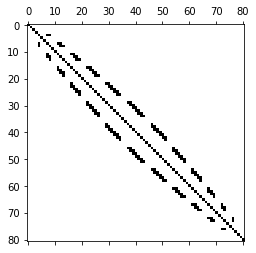

In [8]:
plt.spy(A.array())